In [2]:
def split_it(text):
    splt = text.split()
    bad_chars = [';', ':'," ", "!", "*", "(", ")", '\"', ".", ",", "/", ">", "<"]

    for i in range(len(splt)):
        for b in bad_chars:
            if b in splt[i]:
                splt[i] = splt[i].replace(b, '')
        splt[i]= splt[i].lower()
    
    return splt

In [3]:

from pathlib import Path
from collections import Counter
from nltk.stem import PorterStemmer
import math
from decimal import *
import numpy as np
import pandas as pd
from IPython.display import display




def truncate_float(float_number, decimal_places):
    multiplier = 10 ** decimal_places
    return int(float_number * multiplier) / multiplier




#CALCULATES THE IG OF EACH WORD
def IG(w, total_pos, total_neg, path_pos, path_neg):
    total_reviews= total_pos + total_neg
    
    
     
    files_positive = Path(path_pos).glob('*.txt')
    files_negative = Path(path_neg).glob('*.txt')
     
    
    
    P1= (total_pos/total_reviews)  #probability of positive reviews
    P0= (total_neg/total_reviews)  #probability of negative reviews
    
    entropy= -P1*math.log2(P1)-P0*math.log2(P0)
    
    
  
    pos_counter=0
    neg_counter=0 
    total_counter=0
    

    
    for f in files_positive:
        sp= f.read_text().split()
        if w.lower() in [x.lower() for x in sp]:
            pos_counter+=1
            total_counter+=1
      
    for f2 in files_negative:
        sp2= f2.read_text().split()
        if w.lower() in [x.lower() for x in sp2]:
            neg_counter+=1
            total_counter+=1
    
    
    #Probability of w=1 and w=0 
    P_w1 = total_counter/total_reviews
    P_w0 = (total_reviews- total_counter) / total_reviews

        
   
    #Probability of a C=pos and C=neg when w=1
    if P_w1!=0:
        P1_w1= pos_counter/total_counter 
       
        P0_w1= neg_counter/total_counter
        
    else:
        P1_w1=0
        P0_w1=0
    
    
    
    #Probability of a C=pos and C=neg when w=0
    if P_w0!=0:
        P1_w0 = (total_pos-pos_counter)/(total_reviews- total_counter)
        
        P0_w0 = (total_neg-neg_counter)/(total_reviews - total_counter)
    else:
        P1_w0 = 0
        P0_w0 = 0
    
    
    entropy_w1= (0 if P1_w1==0 else -P1_w1*math.log2(P1_w1)) - (0 if P0_w1==0 else P0_w1*math.log2(P0_w1))
    entropy_w0= (0 if P1_w0==0 else -P1_w0*math.log2(P1_w0)) - (0 if P0_w0==0 else P0_w0*math.log2(P0_w0))

    
    if entropy!=1.0:
        ig= truncate_float(entropy, 6) - truncate_float((P_w1*entropy_w1 + P_w0*entropy_w0), 6)
    else:
        getcontext().prec = 6
        ig= Decimal(1) - Decimal((P_w1*entropy_w1 + P_w0*entropy_w0))
       
    
    
    
    return float(ig)







#FILTERS AN ARRAY OF WORDS BASED ON THEIR IG
def IG_filter(words_filtered, total_pos, total_neg, path_pos, path_neg):
    result=[]
    
    for w in words_filtered:
        ig=IG(w, total_pos, total_neg, path_pos, path_neg)
        if ig >=0.008:
            result.append(w)
    
    return result



In [4]:
import os

class tokenizer():

    #FINDING THE MOST USEFUL ATTRIBUTES (WORDS) IN ALL THE TRAINING DATA
    #CONVERTING THE TRAINING DATA INTO VECTORS OF THE ATTRIBUTES WE CHOSE
    def tokenize(self,path_pos, path_neg):
        
        files_positive = Path(path_pos).glob('*.txt')
        files_negative = Path(path_neg).glob('*.txt')
        
        

        total_pos=0
        total_neg=0

        text= ""
        i=0
        for file in files_positive:
            
            
            text= text+file.read_text()  # the file is opened and closed
            total_pos += 1
            
            
        for file2 in files_negative:
            
            
            total_neg+=1
            text= text+file2.read_text()  
            


        total_reviews= total_pos+total_neg  

        print("Total positive reviews: ",  total_pos)
        print("Total negative reviews: ", total_neg)



        #FILTERING THE REVIEWS TO KEEP THE USEFUL WORDS
    


        
        splt= split_it(text)
        Counters_found = Counter(splt)
        most_occur = Counters_found.most_common(700)



        ps = PorterStemmer()
        words=[]
        for i in range(len(most_occur)):
            words.append(most_occur[i][0])
                

        bad_chars = [';', ':'," ", "!", "*", "(", ")", '\"', ".", ",", "/", ">", "<"]
        words_to_exclude = ['-', '--', ';', ':', "!", "*", " ", "(", ")", '\"', ".", 'it\'s', 'br', 'mr', 'there\'s', 'your', 'wasn\'t', 'Ms', 'were', 'how', 'get', 'will', 'also', 'been', 'some', 'into', 'because', 'about', 'out', 'me', 'up', 'down', 'my', 'mine', 'their', 'she', 'he\'s', 'the','you', 'an', 'his', 'him', 'her', 'or', 'was', 'have', 'has', 'had', 'in', 'i', 'he', 'we', 'they', 'their', 'theirs', 'which','what', 'where', 'be', 'they', 'has', 'so',  'by', 'who', 'that','this', 'those', 'your', 'these', 'on', 'there', 'and', 'to', 'a', 'it', 'its', 'for', 'if', 'then', 'is', 'at', 'are', 'of', 'no', 'as', 'but', 'with', 'there']    

        words_filtered=[]
        for i, w in enumerate(words):
            
            
            for b in bad_chars:
                if b in words[i]:
                    words[i]= words[i].replace(b,'')
                    w=words[i]
                

            
            
            if w.lower() in words_to_exclude:
                #print('removing ' +w)
                #words.remove(w)
                continue

            words_filtered.append(words[i])        
                


        words_filtered= words_filtered[:len(words_filtered)-128]


        self.words_final= IG_filter(words_filtered, total_pos, total_neg, path_pos, path_neg)

            
            
        files_positive2 =Path(path_pos).glob('*.txt')
        files_negative2= Path(path_neg).glob('*.txt')
            
        #TOKENIZES EACH TEXT IN THE MOST USEFUL WORDS WE FOUND
        self.vectors= np.zeros([total_reviews, len(self.words_final)+1], dtype=int)
        i=0
        for file in files_positive2:
            i+=1
            for j,w in enumerate(self.words_final):
                if w.lower() in file.read_text().lower():
                    self.vectors[i][j]=1
            self.vectors[i][len(self.words_final)]=1  # initializing the last cell as 1 (category cell)
    
        i=0
        for file2 in files_negative2:
            i+=1
            for j, w in enumerate(self.words_final):
                if w.lower() in file2.read_text().lower():
                    self.vectors[i][j]=1
            #the last cell in the negative reviews is already 0 
        
        
        vectors_df= pd.DataFrame(self.vectors, columns=self.words_final+ ['Category'])
        display(vectors_df)
        
        return self.vectors
    
    
    
    def get_words_final(self):
        return self.words_final
    
    
    
    
    
    
    def tokenize_new(self, path_pos, path_neg ):
        
        files_positive3 =Path(path_pos).glob('*.txt')
        files_negative3= Path(path_neg).glob('*.txt')
        
        pos_count = len(os.listdir(path_pos))
        neg_count = len(os.listdir(path_neg))
        total_count =pos_count + neg_count
        
        new_vectors= np.zeros([total_count, len(self.words_final)+1], dtype=int)
        
        
        i=0
        for f in files_positive3:
            i+=1
            for j,w in enumerate(self.words_final):
                if w.lower() in f.read_text().lower():
                    new_vectors[i][j]=1
            new_vectors[i][len(self.words_final)]=1  # initializing the last cell as 1 (category cell)
    
        i=0
        for f2 in files_negative3:
            i+=1
            for j, w in enumerate(self.words_final):
                if w.lower() in f2.read_text().lower():
                    new_vectors[i][j]=1
            #the last cell in the negative reviews is already 0 
        
        
        
            
        vectors_df= pd.DataFrame(new_vectors, columns=self.words_final+ ['Category'])
        display(vectors_df)
        
        return new_vectors, vectors_df
            
            

In [5]:

def classification_report(y_real, y_pred, p=1):
    #print(y_pred)
    reports= np.zeros([3,5])
    
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0
    support1= 0
    support0= 0
    
    for i, y in enumerate(y_pred):
        if y== y_real[i] and y==1:
            true_pos+=1
        if y!= y_real[i] and y==1:
            false_pos+=1
        if y!= y_real[i] and y==0:
            false_neg+=1
        if y==y_real[i] and y==0:
            true_neg+=1
        if y_real[i]==1:
            support1+=1
            
    if (true_pos+false_neg) != 0:
        recall= true_pos/(true_pos+false_neg)
    else:
        recall=0
    
    if(true_pos+false_pos) !=0:
        precision = true_pos/ (true_pos +false_pos)
    else:
        precision=0
    


    if (precision+recall) !=0 :
        f1_score= 2*(precision*recall)/(precision+recall)
    else:
        f1_score=0
        
    accuracy = (true_pos + true_neg) / len(y_real)
    
    reports[1][0]= recall
    reports[1][1]= precision
    reports[1][2]= f1_score
    
    reports[1][4] = support1
    
    if(true_neg+false_pos)!=0:
        reports[0][3]= true_neg/(true_neg+false_pos)
    
    if (true_pos+false_neg) !=0:
        reports[1][3]= true_pos/(true_pos+false_neg)
    
    
    
    # reports[2][0] = accuracy 
    # reports[2][1] = accuracy 
    # reports[2][2] = accuracy 
    # reports[2][3] = len(y_real) 
    
    
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0
    for i, y in enumerate(y_pred):
        if y== y_real[i] and y==0:
            true_pos+=1
        if y!= y_real[i] and y==0:
            false_pos+=1
        if y!= y_real[i] and y==1:
            false_neg+=1
        if y==y_real[i] and y==1:
            true_neg+=1
        if y_real[i]==0:
            support0+=1
            
   
    if (true_pos+false_neg) != 0:
        recall= true_pos/(true_pos+false_neg)
    else:
        recall=0
    
    if(true_pos+false_pos) !=0:
        precision = true_pos/ (true_pos +false_pos)
    else:
        precision=0
    
    
    if (precision+recall) !=0 :
        f1_score= 2*(precision*recall)/(precision+recall)
    else:
        f1_score=0
    
    reports[0][0]= recall
    reports[0][1]= precision
    reports[0][2]= f1_score
    
    reports[0][4] = support0
    
    
    reports[2][0] = accuracy
    reports[2][1]= accuracy
    reports[2][2] = accuracy
    reports[2][3] = accuracy
    reports[2][4] = support0 + support1
    
    
    
    
    
    
    
    # support_proportion0= support0/len(y_real)    
    # support_proportion1= support1/len(y_real)
    
    
    # macro_avg_p= (reports[0][1]+reports[1][1])/2
    # macro_avg_r= (reports[0][0] + reports[1][0])/2
    # macro_avg_f1 = (reports[0][2] + reports[1][2])/2
    
    # weighted_avg_r = (reports[0][0]*support_proportion1 + reports[1][0]*support_proportion0)
    # weighted_avg_p= (reports[0][1]*support_proportion1 + reports[1][1]*support_proportion0)
    # weighted_avg_f1= (reports[0][2]*support_proportion1 + reports[1][2]*support_proportion0)
    
    # reports[3][0] = macro_avg_r
    # reports[3][1] = macro_avg_p
    # reports[3][2] = macro_avg_f1
    # reports[3][3] = len(y_real)
    
    # reports[4][0]= weighted_avg_r
    # reports[4][1]= weighted_avg_p
    # reports[4][2] = weighted_avg_f1
    # reports[4][3] =len(y_real)
    
    
    reports_df= pd.DataFrame(reports, columns=['Recall', 'Precision', 'F1-score', 'Accuracy', 'Support'], index=['0','1', 'general accuracy'])
    
    if p==1:
        display(reports_df)
    
    return reports
    
    

In [6]:
#SPLIT FUNCTION IN ORDER TO SPLIT DATA INTO X AND Y
def split(vectors):
    x = vectors[:,:-1]
    y = vectors[:,-1]
    return x, y

In [7]:
class Node():
    def __init__(self,general_feature_index=None, feature_index = None, left=None, right= None, info_gain= None, value=None):
        
        self.general_feature_index = general_feature_index
        self.feature_index = feature_index
        self.right = right
        self.left = left
        
        #for leaf nodes
        self.value = value

In [8]:
def  split_data( data, feature_index):
        
    right_data= np.array([row for row in data if row[feature_index]==1])
    left_data = np.array([row for row in data if row[feature_index]==0])
    
    return left_data, right_data

In [9]:
class decision_tree():
    def __init__(self, max_depth, features=None, min_samples_split=2):
        
        self.root= None
        self.max_depth = max_depth
        self.features = features
        self.min_samples_split = min_samples_split
        
        
        
        
    
    def fit(self, X, Y):
        data = np.column_stack([X, Y])
        self.root = self.build_tree(data, self.features, self.features[-1])

    
    
        
    def entropy(self, data):
        pos_count = 0
        neg_count = 0 
        for i in data:
            if i==1:
                pos_count+=1
            else:
                neg_count+=1
        
        p1 = pos_count/ len(data)
        
        p0= neg_count/ len(data)
        
        
        entr = - (0 if p1==0 else p1*math.log2(p1)) - (0 if p0==0 else p0*math.log2(p0))
       
        return entr
        
    
    
    
    def information_gain(self, parent, l_child, r_child):
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
       
        gain = self.entropy(parent) - (weight_l*self.entropy(l_child)) - (weight_r*self.entropy(r_child))
        
        return gain
    
    
    
    def split_data(self, data, feature_index):
        
        right_data= np.array([row for row in data if row[feature_index]==1])
        left_data = np.array([row for row in data if row[feature_index]==0])
        
        return left_data, right_data
    
    
    
    
    
        
    def build_tree(self, data, features, category_feature ,curr_depth=0):   #feature_index_exclude=[
       
        
        X, Y = data[:,:-1], data[:,-1]
        num_samples, num_features = np.shape(X)
        
        
        if  curr_depth <= self.max_depth:     # and num_samples >= self.min_samples_split and
            best_split = self.get_best_split(data, features, category_feature)     #also had self.features as parameter later feature_index_exclude
            
            if best_split['info_gain'] >0 :
                #f.pop(best_split["feature_index"])
                f= np.delete(features, best_split["feature_index"])    #creates a new array f which is identical to features but without the feature we just used
                left_subtree = self.build_tree(best_split["left_data"], f, category_feature, curr_depth+1)   #had best_split["feature_index"]
                
                right_subtree = self.build_tree(best_split["right_data"], f, category_feature, curr_depth+1)  #had best_split["feature_index"]
                
                return Node(best_split["general_feature_index"], best_split["feature_index"], 
                            left_subtree, right_subtree, best_split["info_gain"])
                
        
        # compute leaf node
        leaf_value = self.calc_leaf(Y)
        return Node(value=leaf_value)
        

    
    
    
    
    
    def get_best_split(self, data, f, category_feature):     #had features as parameter which is dict of words with their ig
        
        
        return_dict= {}
        max_ig= -float("inf")
        #max_word= ""
        #index=0
        for ft, feature in enumerate(f):        #features.keys():
            
            if feature== category_feature: 
                continue
            

            dataset_left, dataset_right = self.split_data(data,  ft)   #instead of f had index  
            
            if len(dataset_left)>0 and  len(dataset_right)>0:
                    
                y, left_y, right_y = data[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                
                curr_info_gain = self.information_gain(y, left_y, right_y)
                
                #print("\n Information gain of ", feature,"= ", curr_info_gain, "\n")
                #print("current info gain= ", curr_info_gain)
                
                if curr_info_gain>max_ig:
                    
                    return_dict["feature_index"] = ft     #instead of f had index
                    return_dict["left_data"] = dataset_left
                    return_dict["right_data"] = dataset_right
                    return_dict["info_gain"] = curr_info_gain
                    return_dict["general_feature_index"] = feature
                    max_ig = curr_info_gain
                    max_feature_excl = feature
                    
                    #print(return_dict)
            
            else:
                
                #if the info gain stays 0 till the end of the for loop, it means that 
                #there are no features that split the data based on their value 
                #meaning that the features left have the same value for all the data 
                if 0 > max_ig: 
                    return_dict["info_gain"] = 0
                continue
                
    
        return return_dict 
            
            
            
            
    def predict(self, X):
                
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
            
            
            
    def make_prediction(self, x, tree):
        
        if tree.value!=None: 
            return tree.value
        
        feature_val = x[tree.general_feature_index]
        if feature_val==0:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)        
            
            
        
    def calc_leaf(self, Y):
        c0, c1= 0, 0 
        #Y = list(Y)
        for y in Y:
            if y==1:
                c1+=1
            else:
                c0+=1
        
        if c0>c1:
            return 0
        else:
            return 1
        #return max(Y, key=Y.count)

In [10]:
def count(y, n):
    c=0
    for i in y:
        if i==n:
            c+=1
    return c

In [11]:
import random

class random_forest():
    
    def __init__(self, max_depth=5, max_trees=10, number_of_features=4):
        self.max_depth= max_depth
        self.max_trees= max_trees
        self.number_of_features = number_of_features
        
        
    
    def fit(self, X, Y):
      
        self.data = np.column_stack([X, Y])
        
        #initializing the decision tree array
        dt = np.dtype(object)
        self.d_tree_array = np.ndarray((self.max_trees,), dtype= dt)   
        
        arr= []
        for t in range(self.max_trees):
            
            #randomly select 4 features
            features= np.zeros([self.number_of_features+1, 1], dtype= int)         
            for j in range(self.number_of_features):
                a = random.randint(0, X.shape[1]-2)
                while a in features:
                    a = random.randint(0, X.shape[1]-2)
                features[j] = a                      #feature array contains the indices of the features we use in every tree
            features[features.shape[0]-1]= self.data.shape[1]-1    
                    
                    
            arr= np.zeros([X.shape[0], len(features)], dtype=int)
            
            for i in range(self.data.shape[0]):
                r = random.randint(0,self.data.shape[0]-1)
                new_X = [self.data[r][f] for f in features]
                
                arr[i] = new_X   

            d_t = decision_tree(self.max_depth, features)
            x, y= split(arr)
            d_t.fit(x, y)
            
            self.d_tree_array[t] = d_t
            
            
            
            
    def predict(self, x_data):
        
        predictions = np.zeros([x_data.shape[0], len(self.d_tree_array)], dtype=int)
        
        for ind_t , t in enumerate(self.d_tree_array):
            Y =  self.d_tree_array[ind_t].predict(x_data)           #t.predict(x_data)
           
            for i in range(x_data.shape[0]):
                predictions[i][ind_t] = Y[i]
                
            
        
        final_predictions = np.empty(predictions.shape[0], dtype=int)   
 
        for d in range(predictions.shape[0]):
            y= predictions[d]
            
            if count(y, 1) > count(y, 0):
                final_predictions[d]= 1
            else:
                final_predictions[d]= 0
            
            
            #final_predictions[d] = max(y, key= y.count)
            
        return final_predictions
            
    
        
        
                
    

In [13]:
#TRAINING THE ALGORITHM


path_pos= '/Users/michail/Downloads/aclImdb/train/pos'
path_neg= '/Users/michail/Downloads/aclImdb/train/neg'

t = tokenizer()

train_vectors= t.tokenize(path_pos, path_neg)

Total positive reviews:  12500
Total negative reviews:  12500


,just,even,well,great,bad,don't,best,plot,love,nothing,...,awful,terrible,perfect,supposed,waste,loved,worse,favorite,horrible,Category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,1,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
4,1,1,1,1,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
path_pos= '/Users/michail/Downloads/aclImdb/test/pos'
path_neg= '/Users/michail/Downloads/aclImdb/test/neg'

test_vectors, df_study= t.tokenize_new(path_pos, path_neg)

,just,even,well,great,bad,don't,best,plot,love,nothing,...,awful,terrible,perfect,supposed,waste,loved,worse,favorite,horrible,Category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1,1,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
x_train, y_train= split(train_vectors)

In [16]:
rf= random_forest(max_depth=11,max_trees=150, number_of_features=10)
rf.fit(x_train, y_train)
print('fit done')
y_pred= rf.predict(x_train)

fit done


In [17]:
classification_report(y_train, y_pred)

,Recall,Precision,F1-score,Accuracy,Support
0,1.00000,0.965549,0.982473,1.00000,12500.0
1,0.96432,1.000000,0.981836,0.96432,12500.0
general accuracy,0.98216,0.982160,0.982160,0.98216,25000.0


array([[1.00000000e+00, 9.65549204e-01, 9.82472687e-01, 1.00000000e+00,
        1.25000000e+04],
       [9.64320000e-01, 1.00000000e+00, 9.81835953e-01, 9.64320000e-01,
        1.25000000e+04],
       [9.82160000e-01, 9.82160000e-01, 9.82160000e-01, 9.82160000e-01,
        2.50000000e+04]])

In [18]:
x_test, y_test= split(test_vectors)

In [19]:
y_test_pred = rf.predict(x_test)

In [20]:
classification_report(y_test, y_test_pred)

,Recall,Precision,F1-score,Accuracy,Support
0,1.00000,0.963986,0.981663,1.00000,12500.0
1,0.96264,1.000000,0.980964,0.96264,12500.0
general accuracy,0.98132,0.981320,0.981320,0.98132,25000.0


array([[1.00000000e+00, 9.63985502e-01, 9.81662544e-01, 1.00000000e+00,
        1.25000000e+04],
       [9.62640000e-01, 1.00000000e+00, 9.80964415e-01, 9.62640000e-01,
        1.25000000e+04],
       [9.81320000e-01, 9.81320000e-01, 9.81320000e-01, 9.81320000e-01,
        2.50000000e+04]])

In [27]:

def draw_diagram(obj, metric='Accuracy'): 

    import matplotlib.pyplot as plt
    #def plot_learning_curve(x_train, y_test):
        
        
    plt.figure()
    
    if metric.lower()=='accuracy':
        plt.title("Training curve")
    else:
        plt.title(metric.capitalize()+" Curve")
    
    plt.xlabel("Examples")
    plt.ylabel(metric.capitalize())
        
    tr_samples= np.linspace(20, x_train.shape[0],100)
        
    eval=[]
    for sample in tr_samples:
        rep_train = classification_report(y_train[:int(sample)], obj.predict(x_train[:int(sample)]), 0)

        results={
            'sample number': sample,
            'recall': rep_train[0][0],
            'precision': rep_train[0][1],
            'f1-score': rep_train[0][2],
            'accuracy': rep_train[2][0]
        }
        eval.append(results)
            
            
            
    # train_recall= [s['recall'] for s in eval]
    # train_precision= [s['precision'] for s in eval]
    # train_accuracy = [s['accuracy'] for s in eval]
    
    train_metric = [s[metric.lower()] for s in eval]

    train_sample_numbers= [s['sample number'] for s in eval]

    plt.plot(train_sample_numbers,train_metric , 'r', label= "Training score")    
        
    print("\nTraining sample size: ", train_sample_numbers )
        
    test_samples= np.linspace(20, x_test.shape[0], 100)
    eval2=[]
    for sample in test_samples:
        rep_test= classification_report(y_test[:int(sample)], obj.predict(x_test[:int(sample)]), 0)
        
        results2={
            'sample number': sample,
            'recall': rep_test[0][0],
            'precision': rep_test[0][1],
            'f1-score': rep_test[0][2],
            'accuracy': rep_test[2][0]
        }
        
        eval2.append(results2)


    # test_recall= [s['recall'] for s in eval2]
    # test_precision= [s['precision'] for s in eval2]
    # test_accuracy = [s['accuracy'] for s in eval2]
    
    test_metric= [s[metric.lower()] for s in eval2]
    
    test_sample_numbers= [s['sample number'] for s in eval2]
    plt.plot(test_sample_numbers,test_metric , 'g', label= "Test score")    
    
    plt.legend(loc="lower right")

        
    #plt.show()
    return plt



Training sample size:  [20.0, 272.32323232323233, 524.6464646464647, 776.969696969697, 1029.2929292929293, 1281.6161616161617, 1533.939393939394, 1786.2626262626263, 2038.5858585858587, 2290.909090909091, 2543.2323232323233, 2795.5555555555557, 3047.878787878788, 3300.2020202020203, 3552.5252525252527, 3804.848484848485, 4057.1717171717173, 4309.49494949495, 4561.818181818182, 4814.141414141414, 5066.464646464647, 5318.787878787879, 5571.111111111111, 5823.434343434344, 6075.757575757576, 6328.080808080808, 6580.404040404041, 6832.727272727273, 7085.050505050505, 7337.373737373738, 7589.69696969697, 7842.020202020202, 8094.343434343435, 8346.666666666668, 8598.9898989899, 8851.31313131313, 9103.636363636364, 9355.959595959597, 9608.282828282829, 9860.60606060606, 10112.929292929293, 10365.252525252527, 10617.575757575758, 10869.89898989899, 11122.222222222223, 11374.545454545456, 11626.868686868687, 11879.191919191919, 12131.515151515152, 12383.838383838385, 12636.161616161617, 12888.

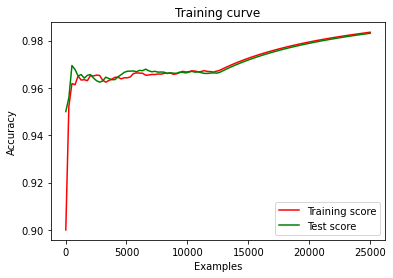

In [ ]:
draw_diagram(rf)


Training sample size:  [20.0, 272.32323232323233, 524.6464646464647, 776.969696969697, 1029.2929292929293, 1281.6161616161617, 1533.939393939394, 1786.2626262626263, 2038.5858585858587, 2290.909090909091, 2543.2323232323233, 2795.5555555555557, 3047.878787878788, 3300.2020202020203, 3552.5252525252527, 3804.848484848485, 4057.1717171717173, 4309.49494949495, 4561.818181818182, 4814.141414141414, 5066.464646464647, 5318.787878787879, 5571.111111111111, 5823.434343434344, 6075.757575757576, 6328.080808080808, 6580.404040404041, 6832.727272727273, 7085.050505050505, 7337.373737373738, 7589.69696969697, 7842.020202020202, 8094.343434343435, 8346.666666666668, 8598.9898989899, 8851.31313131313, 9103.636363636364, 9355.959595959597, 9608.282828282829, 9860.60606060606, 10112.929292929293, 10365.252525252527, 10617.575757575758, 10869.89898989899, 11122.222222222223, 11374.545454545456, 11626.868686868687, 11879.191919191919, 12131.515151515152, 12383.838383838385, 12636.161616161617, 12888.

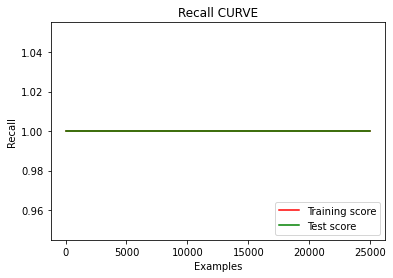

In [22]:
d= draw_diagram(rf,'Recall')


Training sample size:  [20.0, 272.32323232323233, 524.6464646464647, 776.969696969697, 1029.2929292929293, 1281.6161616161617, 1533.939393939394, 1786.2626262626263, 2038.5858585858587, 2290.909090909091, 2543.2323232323233, 2795.5555555555557, 3047.878787878788, 3300.2020202020203, 3552.5252525252527, 3804.848484848485, 4057.1717171717173, 4309.49494949495, 4561.818181818182, 4814.141414141414, 5066.464646464647, 5318.787878787879, 5571.111111111111, 5823.434343434344, 6075.757575757576, 6328.080808080808, 6580.404040404041, 6832.727272727273, 7085.050505050505, 7337.373737373738, 7589.69696969697, 7842.020202020202, 8094.343434343435, 8346.666666666668, 8598.9898989899, 8851.31313131313, 9103.636363636364, 9355.959595959597, 9608.282828282829, 9860.60606060606, 10112.929292929293, 10365.252525252527, 10617.575757575758, 10869.89898989899, 11122.222222222223, 11374.545454545456, 11626.868686868687, 11879.191919191919, 12131.515151515152, 12383.838383838385, 12636.161616161617, 12888.

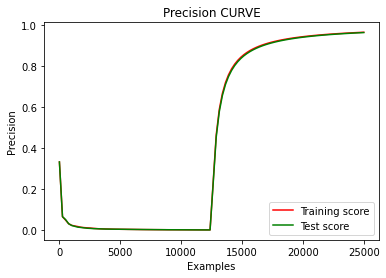

In [23]:
d= draw_diagram(rf,'Precision')


Training sample size:  [20.0, 272.32323232323233, 524.6464646464647, 776.969696969697, 1029.2929292929293, 1281.6161616161617, 1533.939393939394, 1786.2626262626263, 2038.5858585858587, 2290.909090909091, 2543.2323232323233, 2795.5555555555557, 3047.878787878788, 3300.2020202020203, 3552.5252525252527, 3804.848484848485, 4057.1717171717173, 4309.49494949495, 4561.818181818182, 4814.141414141414, 5066.464646464647, 5318.787878787879, 5571.111111111111, 5823.434343434344, 6075.757575757576, 6328.080808080808, 6580.404040404041, 6832.727272727273, 7085.050505050505, 7337.373737373738, 7589.69696969697, 7842.020202020202, 8094.343434343435, 8346.666666666668, 8598.9898989899, 8851.31313131313, 9103.636363636364, 9355.959595959597, 9608.282828282829, 9860.60606060606, 10112.929292929293, 10365.252525252527, 10617.575757575758, 10869.89898989899, 11122.222222222223, 11374.545454545456, 11626.868686868687, 11879.191919191919, 12131.515151515152, 12383.838383838385, 12636.161616161617, 12888.

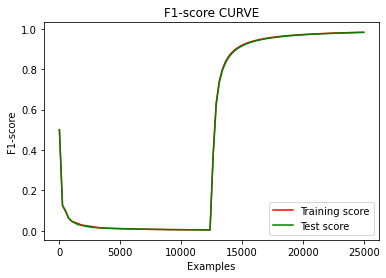

In [24]:
d= draw_diagram(rf,'F1-score')

Sklearn implementation


In [25]:
from sklearn.ensemble import RandomForestClassifier


rf2 = RandomForestClassifier()
rf2.fit(x_train, y_train)


classification_report(y_train, rf2.predict(x_train))

,Recall,Precision,F1-score,Accuracy,Support
0,1.000,0.998004,0.999001,1.000,12500.0
1,0.998,1.000000,0.998999,0.998,12500.0
general accuracy,0.999,0.999000,0.999000,0.999,25000.0


array([[1.00000000e+00, 9.98003992e-01, 9.99000999e-01, 1.00000000e+00,
        1.25000000e+04],
       [9.98000000e-01, 1.00000000e+00, 9.98998999e-01, 9.98000000e-01,
        1.25000000e+04],
       [9.99000000e-01, 9.99000000e-01, 9.99000000e-01, 9.99000000e-01,
        2.50000000e+04]])

In [26]:
classification_report(y_test, rf2.predict(x_test))

,Recall,Precision,F1-score,Accuracy,Support
0,1.00000,0.998084,0.999041,1.00000,12500.0
1,0.99808,1.000000,0.999039,0.99808,12500.0
general accuracy,0.99904,0.999040,0.999040,0.99904,25000.0


array([[1.00000000e+00, 9.98083679e-01, 9.99040921e-01, 1.00000000e+00,
        1.25000000e+04],
       [9.98080000e-01, 1.00000000e+00, 9.99039078e-01, 9.98080000e-01,
        1.25000000e+04],
       [9.99040000e-01, 9.99040000e-01, 9.99040000e-01, 9.99040000e-01,
        2.50000000e+04]])


Training sample size:  [20.0, 272.32323232323233, 524.6464646464647, 776.969696969697, 1029.2929292929293, 1281.6161616161617, 1533.939393939394, 1786.2626262626263, 2038.5858585858587, 2290.909090909091, 2543.2323232323233, 2795.5555555555557, 3047.878787878788, 3300.2020202020203, 3552.5252525252527, 3804.848484848485, 4057.1717171717173, 4309.49494949495, 4561.818181818182, 4814.141414141414, 5066.464646464647, 5318.787878787879, 5571.111111111111, 5823.434343434344, 6075.757575757576, 6328.080808080808, 6580.404040404041, 6832.727272727273, 7085.050505050505, 7337.373737373738, 7589.69696969697, 7842.020202020202, 8094.343434343435, 8346.666666666668, 8598.9898989899, 8851.31313131313, 9103.636363636364, 9355.959595959597, 9608.282828282829, 9860.60606060606, 10112.929292929293, 10365.252525252527, 10617.575757575758, 10869.89898989899, 11122.222222222223, 11374.545454545456, 11626.868686868687, 11879.191919191919, 12131.515151515152, 12383.838383838385, 12636.161616161617, 12888.

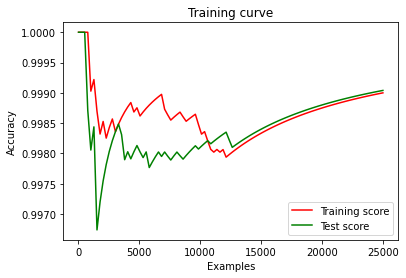

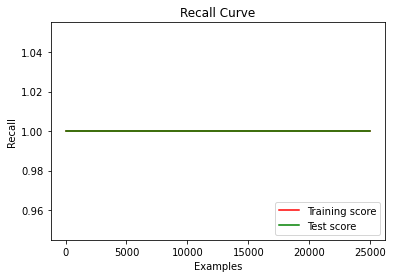

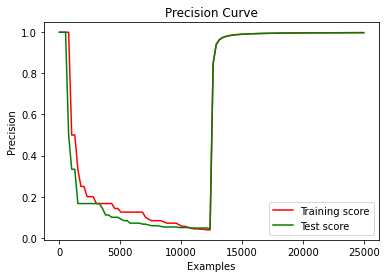

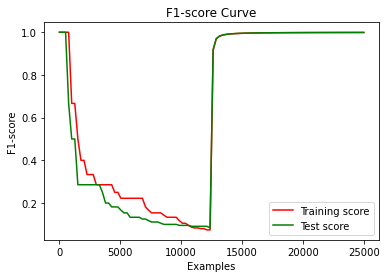

In [28]:
d= draw_diagram(rf2)
d= draw_diagram(rf2,'Recall')
d= draw_diagram(rf2,'Precision')
d= draw_diagram(rf2,'F1-score')

positives that we found:  13
positive accuracy:  0.6842105263157895
negatives that we found:  1
negative accuracy:  1.0
positives that we found:  210
positive accuracy:  0.7749077490774908
negatives that we found:  1
negative accuracy:  1.0
positives that we found:  399
positive accuracy:  0.762906309751434
negatives that we found:  1
negative accuracy:  1.0
positives that we found:  581
positive accuracy:  0.7496774193548387
negatives that we found:  1
negative accuracy:  1.0
positives that we found:  767
positive accuracy:  0.7461089494163424
negatives that we found:  1
negative accuracy:  1.0
positives that we found:  962
positive accuracy:  0.7515625
negatives that we found:  1
negative accuracy:  1.0
positives that we found:  1161
positive accuracy:  0.7578328981723238
negatives that we found:  1
negative accuracy:  1.0
positives that we found:  1363
positive accuracy:  0.7635854341736694
negatives that we found:  1
negative accuracy:  1.0
positives that we found:  1559
positive a

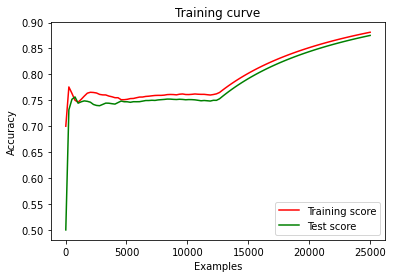

In [450]:
import matplotlib.pyplot as plt
#def plot_learning_curve(x_train, y_test):
    
    
plt.figure()
plt.title("Training curve")
plt.xlabel("Examples")
plt.ylabel("Accuracy")
    
tr_samples= np.linspace(20, x_train.shape[0],100)
    
eval=[]
for sample in tr_samples:
    rep_train = classification_report(y_train[:int(sample)], rf.predict(x_train[:int(sample)]), 0)

    results={
        'sample number': sample,
        'recall': rep_train[0][0],
        'precision': rep_train[0][1],
        'f1-score': rep_train[0][2],
        'general accuracy': rep_train[2][0]
    }
    eval.append(results)
        
        
        
train_recall= [s['recall'] for s in eval]
train_precision= [s['precision'] for s in eval]
train_accuracy = [s['general accuracy'] for s in eval]

train_sample_numbers= [s['sample number'] for s in eval]

plt.plot(train_sample_numbers,train_accuracy , 'r', label= "Training score")    
    
print("\nTraining sample size: ", train_sample_numbers )
    
test_samples= np.linspace(20, x_test.shape[0], 100)
eval2=[]
for sample in test_samples:
    rep_test= classification_report(y_test[:int(sample)], rf.predict(x_test[:int(sample)]), 0)
    
    results2={
        'sample number': sample,
        'recall': rep_test[0][0],
        'precision': rep_test[0][1],
        'f1-score': rep_test[0][2],
        'general accuracy': rep_test[2][0]
    }
    
    eval2.append(results2)


test_recall= [s['recall'] for s in eval2]
test_precision= [s['precision'] for s in eval2]
test_sample_numbers= [s['sample number'] for s in eval2]
test_accuracy = [s['general accuracy'] for s in eval2]
    
plt.plot(test_sample_numbers,test_accuracy , 'g', label= "Test score")    
    
plt.legend(loc="lower right")

    
plt.show()
